In [1]:
# Import dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Read citation data

citation_df = pd.read_csv("LA_Citation_by_District_2018.csv", encoding="UTF-8", low_memory = False)  

# Display data

citation_df.head()

,Ticket number,Issue Date,Issue time,Fine amount,Latitude,Longitude,Violation Description,district
0,4332297130,05/17/2018,2154.0,68.0,33.985738,-118.472205,STANDNG IN ALLEY,santa monica
1,4327378860,03/05/2018,1226.0,68.0,33.982171,-118.469523,EXCEED 72HRS-ST,santa monica
2,4326849531,02/28/2018,1113.0,25.0,33.982171,-118.469523,DISPLAY OF TABS,santa monica
3,4327378871,03/05/2018,1237.0,68.0,33.982171,-118.469523,EXCEED 72HRS-ST,santa monica
4,4332485964,05/16/2018,1218.0,93.0,33.990481,-118.477050,STOP/STAND PROHIBIT,santa monica


In [2]:
# Create bins for the time frames

bins = [0.0, 359.0, 759.0, 1159.0, 1559.0, 1959.0, 2400.0]

# Label the time frames

times = ["12:00am-3:59am", "4:00am-7:59am", "8:00am-11:59pm", "12:00pm-3:59pm", "4:00pm-7:59pm", "8:00pm-11:59pm"]

In [3]:
# Bin the data into the labels and bins created above

citation_df["Time Frame"] = pd.cut(citation_df["Issue time"], bins, labels=times)

# Display the data

citation_df.head()

,Ticket number,Issue Date,Issue time,Fine amount,Latitude,Longitude,Violation Description,district,Time Frame
0,4332297130,05/17/2018,2154.0,68.0,33.985738,-118.472205,STANDNG IN ALLEY,santa monica,8:00pm-11:59pm
1,4327378860,03/05/2018,1226.0,68.0,33.982171,-118.469523,EXCEED 72HRS-ST,santa monica,12:00pm-3:59pm
2,4326849531,02/28/2018,1113.0,25.0,33.982171,-118.469523,DISPLAY OF TABS,santa monica,8:00am-11:59pm
3,4327378871,03/05/2018,1237.0,68.0,33.982171,-118.469523,EXCEED 72HRS-ST,santa monica,12:00pm-3:59pm
4,4332485964,05/16/2018,1218.0,93.0,33.990481,-118.477050,STOP/STAND PROHIBIT,santa monica,12:00pm-3:59pm


In [4]:
# Use groupby() and mean() to get average fine amount by district and time frame

fine_by_time = pd.DataFrame(citation_df.groupby(["district", "Time Frame"]).mean()["Fine amount"])

# Display data

fine_by_time.head()

Fine amount
district Time Frame                 
alhambra 12:00am-3:59am         93.0
         4:00am-7:59am          93.0
         8:00am-11:59pm         58.5
         12:00pm-3:59pm         68.0
         4:00pm-7:59pm          93.0

In [5]:
# Reset index

fine_by_time_df = fine_by_time.reset_index()

# Rename column so "district" is "District"

fine_by_time_df = fine_by_time_df.rename(columns={"district":"District"})

# Pivot table so that index is "district", columns is "Time Frame", and values are "Fine amount"

pivot_df = fine_by_time_df.pivot(index="District",columns="Time Frame", values="Fine amount")

# Set NaN values to zero so data can be visualized

pivot_final = pivot_df.fillna(value=0)

# Round the values

data_fine = pivot_final.round()

# Display the data

data_fine


Time Frame,12:00am-3:59am,4:00am-7:59am,8:00am-11:59pm,12:00pm-3:59pm,4:00pm-7:59pm,8:00pm-11:59pm
District,,,,,,
alhambra,93.0,93.0,58.0,68.0,93.0,0.0
beverly hills,58.0,67.0,68.0,67.0,65.0,66.0
burbank,75.0,71.0,68.0,67.0,69.0,75.0
calabasas,77.0,84.0,73.0,72.0,68.0,71.0
carson,75.0,69.0,74.0,73.0,84.0,59.0
culver city,70.0,70.0,71.0,66.0,70.0,69.0
east los angeles,79.0,77.0,71.0,71.0,71.0,79.0
el segundo,71.0,66.0,65.0,69.0,69.0,73.0
gardena,71.0,75.0,61.0,66.0,58.0,67.0


Text(0.5, 1, 'Average Citation Fine by District and Time')

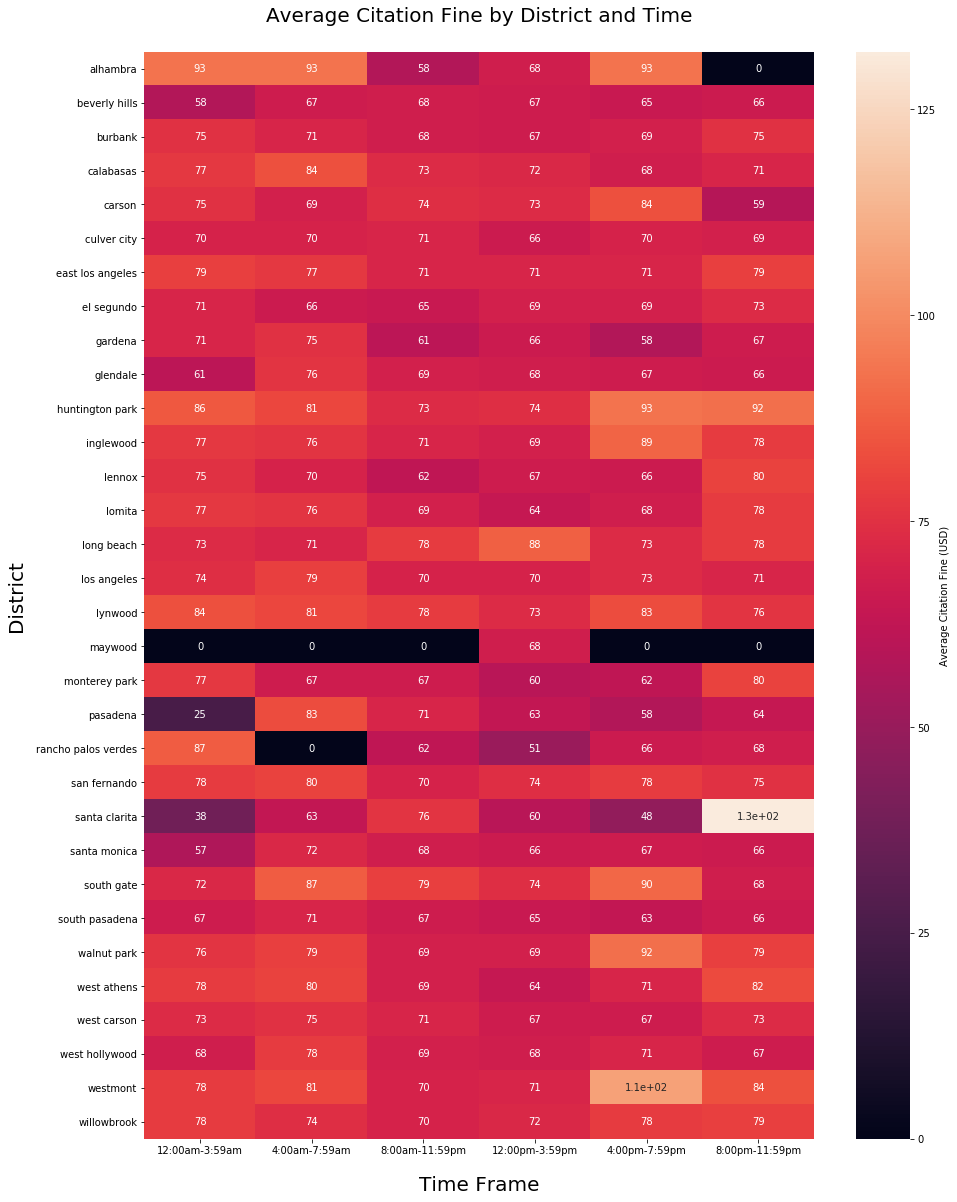

In [6]:
# Create heatmap of data

fig = plt.figure(figsize=(15,20))
sb.heatmap(data_fine, annot=True, cbar_kws={"label":"Average Citation Fine (USD)"})

# Label axes and title

plt.xlabel('Time Frame', fontsize=20, labelpad=20)
plt.ylabel('District', fontsize=20, labelpad=10)
plt.title("Average Citation Fine by District and Time", fontsize=20, pad = 30)


In [7]:
# Save heatmap

fig.savefig('Average_Citation_Fine_by_District_and_Time.png')

# Close plot

plt.close()

In [8]:
# Use groupby() and count() to get the total citations by district and time

citation_count = pd.DataFrame(citation_df.groupby(["district", "Time Frame"]).count()["Ticket number"])

# Reset index

citation_data = citation_count.reset_index()

# Pivot data so heatmap can be created

citation_pivot = citation_data.pivot(index="district",columns="Time Frame", values="Ticket number")

# Replace NaN values with zero

citation_count_data = citation_pivot.fillna(value=0)

# Display data

citation_count_data

Time Frame,12:00am-3:59am,4:00am-7:59am,8:00am-11:59pm,12:00pm-3:59pm,4:00pm-7:59pm,8:00pm-11:59pm
district,,,,,,
alhambra,4.0,3.0,4.0,1.0,2.0,0.0
beverly hills,3016.0,1808.0,33773.0,22481.0,14655.0,3163.0
burbank,920.0,1254.0,16907.0,9478.0,4177.0,2419.0
calabasas,1783.0,2096.0,15075.0,6870.0,5497.0,2362.0
carson,146.0,59.0,78.0,186.0,17.0,2.0
culver city,6417.0,4164.0,26412.0,14705.0,5119.0,2139.0
east los angeles,2469.0,1146.0,4690.0,1771.0,385.0,402.0
el segundo,1644.0,827.0,1751.0,3642.0,2194.0,1568.0
gardena,203.0,65.0,95.0,183.0,102.0,29.0


Text(0.5, 1, 'Citation Count by District and Time')

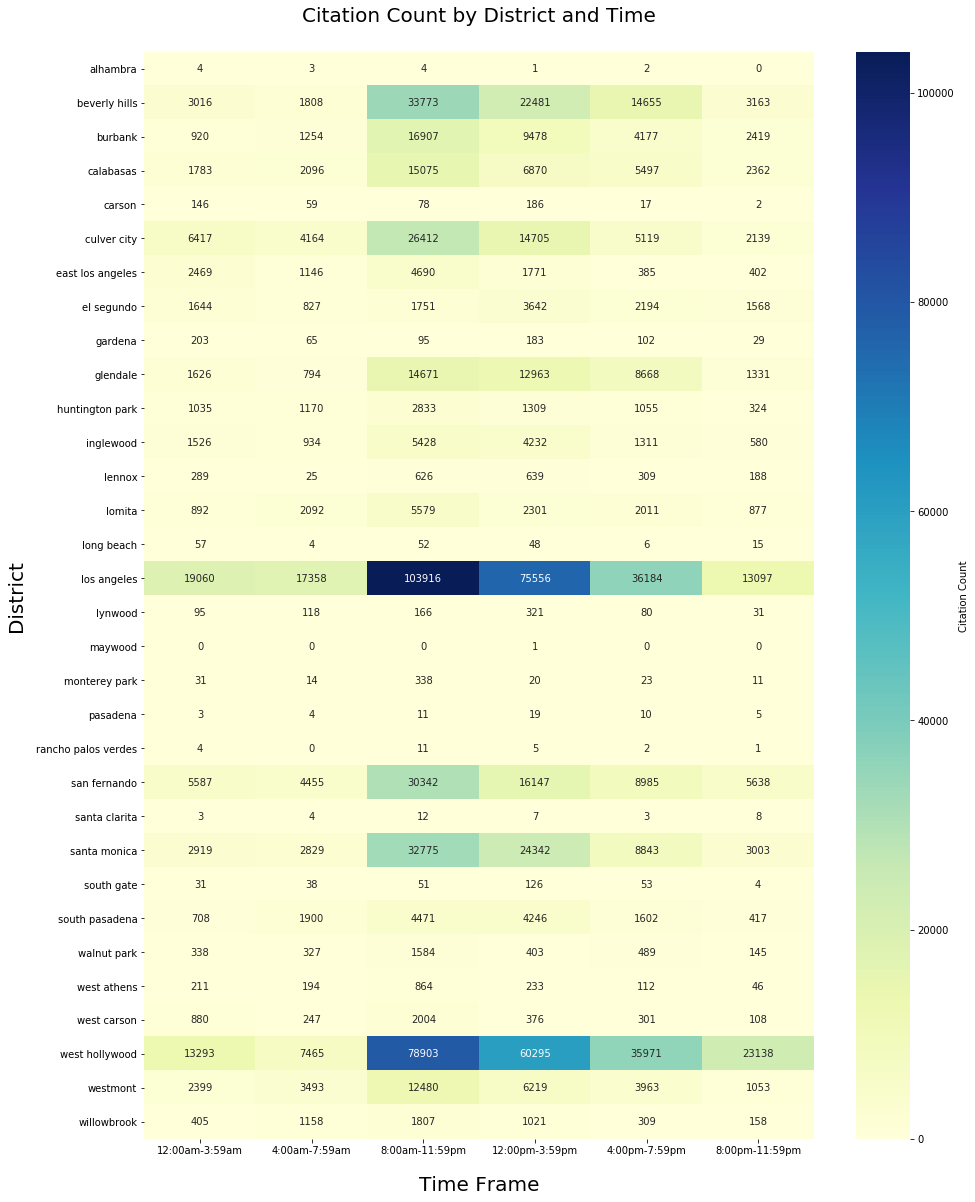

In [9]:
# Create heatmap

fig = plt.figure(figsize=(15,20))
sb.heatmap(citation_count_data, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={"label":"Citation Count"})

# Label axes and title

plt.xlabel('Time Frame', fontsize=20, labelpad=20)
plt.ylabel('District', fontsize=20, labelpad=10)
plt.title("Citation Count by District and Time", fontsize=20, pad = 30)

In [10]:
# Save heatmap

fig.savefig('Citation_Count_by_District_and_Time.png')

# Close plot

plt.close()